In [21]:
# September 9, 2017
# This is a supply and demand curve diagram with the axes ticks turned off.
# I will post it on the web in case others might find it useful.
# http://moneymarketsandmisperceptions.blogspot.com/2016/09/building-supply-and-demand-graphs-in.html
# http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html

import matplotlib.pyplot as plt  # for plot  diagrams
import numpy as np  # for constructing vectors.

# For solving out for the equilibrium price, etc. ,symbolically.
from sympy import *

from cycler import cycler

In [22]:
# We need to establish that Q is just a symbol, with no number value.
Q = Symbol('Q')
a1, a2, externality = 2, 1, 3
Ps = a1+a2*Q
Psocial = a1 + externality + a2*Q
a3, a4 = 12, 1
Pd = a3 - a4*Q

In [23]:

# Now we find the equilibrium quantity. The blank print is to skip a line for easier reading.
Qeq = solve(Ps-Pd,  Q)
Qeq

[5]

In [24]:
# But a solution to the solve command is a list, not a float number, so we convert.
Qeq = float(Qeq[0])
Peq = a1+a2*Qeq
Peq, Qeq

(7.0, 5.0)

In [25]:
# We also want the height of the S,   S+3, and D curves at the  equilibrium quantity.
PsQeq = a1 + a2*Qeq
PsocialQeq = a1 + 3 + a2*Qeq
PdQeq = a3 - a4*Qeq
PsQeq, PsocialQeq, PdQeq

(7.0, 10.0, 7.0)

In [26]:
# Now we find the optimal quantity.
Qstar = solve(Psocial-Pd,  Q)
Qstar

[7/2]

In [27]:
# But a solution to the solve command is a list, not a float number, so we convert.
Qstar = float(Qstar[0])
Pstar = a1+3 + a2*Qstar
Pstar, Qstar

(8.5, 3.5)

In [28]:

# We also want the height of the S,   S+3, and D curves at the   value-maximizing quantity.
PsQstar = a1 + a2*Qstar
PsocialQstar = a1 + 3 + a2*Qstar
PdQstar = a3 - a4*Qstar
PsQstar, PsocialQstar, PdQstar

(5.5, 8.5, 8.5)

In [29]:
type(plt.rcParams['axes.prop_cycle'])

cycler.Cycler

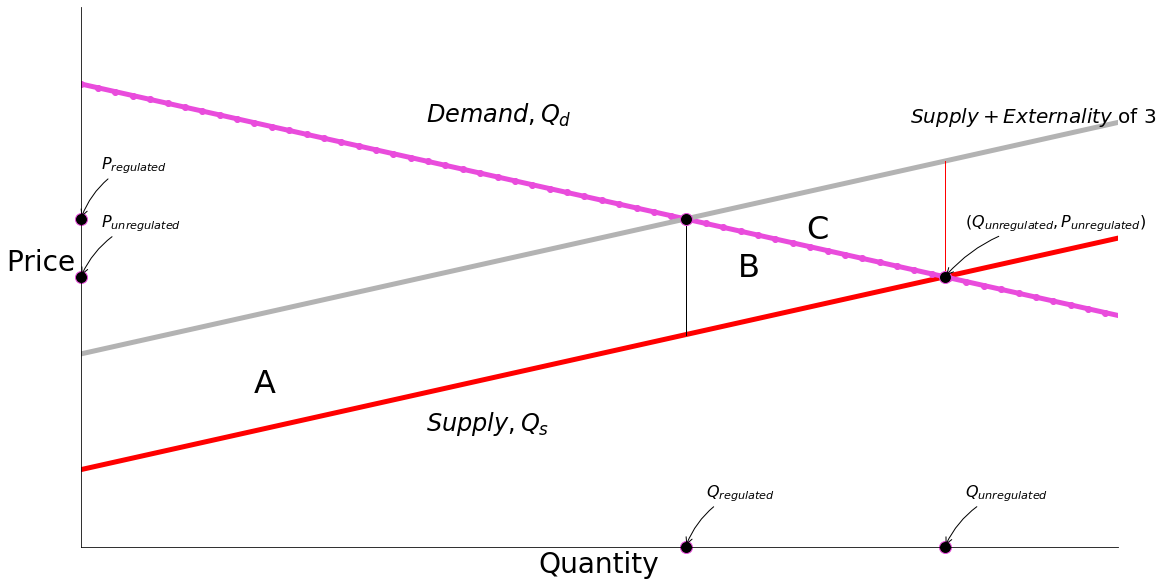

In [33]:
# Now we start drawing the supply and demand curves.
# This sets the default width of plot lines.
plt.rcParams['lines.linewidth'] = 5
plt.rcParams['lines.color'] = 'black'  # This is for straight lines.

# This is for plot lines, oddly enough.
plt.rcParams['axes.prop_cycle'] = cycler(color=["r", "#e94cdc", "0.7"])
# It is hard to find the names to set markerface color, for example.

# We will have  a figure and axes, and we name them.
# Also, we say the figure will be big in size, so we can judge points better.
fig, ax = plt.subplots(figsize=(20, 10))

# We want to get rid of the box around the diagram this way:
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# In putting on labels, we want a horizontal label on the y-axis as well as the x-axis.
plt.xlabel("Quantity", fontsize=28)
plt.ylabel("Price        ", fontsize=28, rotation=0)

# Here are the actual things to plot.
# Q is now  a set of 200 points between  0 and  20 at which to sample the function plotted.
Q = np.linspace(0, 20, 200)     # sampling task

# We need to redefine our supply and demand equations (but the parameters are still OK)
Ps = a1+a2*Q
Psocial = a1 + externality + a2*Q
Pd = a3 - a4*Q

# Let's turn the x and y ticks off, since this is a qualitative diagram.
plt.xticks([])
plt.yticks([])
# We can turn on axis ticks for drawing help.
#plt.xticks(np.arange(0, max(Q)+1, 1.0))
#plt.yticks(np.arange(0, max(Ps)+1, 1.0))

# Set x, y  limits for the points covered by the diagram.
plt.xlim(0, 6)
plt.ylim(0, 14)

# plt.plot is the object that has the actual plot. We will ahve three plots on one figure.a
# I made the demadn curve look a little different.
plt.plot(Q, Ps)
plt.plot(Q, Pd, marker='o')
plt.plot(Q, Psocial)

# Here is how to connect two points [x1,x2]  and  [y1,y2] with a line:
plt.plot([Qstar, Qstar], [PsQstar, PsocialQstar], linewidth=1, color='black')
plt.plot([Qeq, Qeq], [PsQeq, PsocialQeq], linewidth=1)


# Put  dots (o)  at  [x1,x2]  and  [y1,y2]. Make sure they aren't clipped off at the axes.
plt.plot([0, 0, Qstar, Qstar, Qeq, Qeq], [PsQeq, PdQstar,   PdQstar, 0, PsQeq, 0],   'o',
         markerfacecolor='black', markersize=12, clip_on=False,)


# This next was supposed to fill in between the curves gray, but it leaves off a little bit.So I gave up.
#ax.fill_between(Q,  Ps, Psocial, where= Q<=Qstar,    facecolor='gray', interpolate=True)

# Add  some text    to point (2,3) using Latex to get a subscript.
plt.text(2, 3, "$Supply, Q_s$", fontsize=24)
plt.text(2, 11, "$Demand, Q_d$", fontsize=24)
plt.text(4.8,  11, "$Supply + Externality$ of 3", fontsize=20)
plt.text(1, 4, "A", fontsize=32)
plt.text(3.8, 7, "B", fontsize=32)
plt.text(4.2,  8, "C", fontsize=32)

# Turn the next line on to help with guessing where text should be.
#ax.minorticks_on(); ax.grid(which='both');

# The annotate method  inserts an arrow and a phrase.
# It points the arrow at xy and puts the text xytext distance away.
plt.annotate(r'  $(Q_{unregulated},  P_{unregulated})$',
             xy=(Qeq, PsQeq),  xycoords='data',
             xytext=(+10, +50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.annotate(r'  $Q_{unregulated}$',
             xy=(Qeq, 0),  xycoords='data',
             xytext=(+10, +50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.annotate(r'  $Q_{regulated}$',
             xy=(Qstar, 0),  xycoords='data',
             xytext=(+10, +50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.annotate(r'  $P_{unregulated}$',
             xy=(0, PsQeq),  xycoords='data',
             xytext=(+10, +50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.annotate(r'  $P_{regulated}$',
             xy=(0, PdQstar),  xycoords='data',
             xytext=(+10, +50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))


# The next command decides how much white space to put around the plot when it is saved.
plt.subplots_adjust(left=0.18, right=0.9, top=0.9, bottom=0.15)
plt.savefig("ans02-04.png")  # Needs to be before plt.show()

plt.show()

plt.close("all")
